In [15]:
!pip install openpyxl plotly

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import ttest_ind

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [16]:
from google.colab import files

uploaded = files.upload()  # Choose your Excel file

filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df = pd.read_excel(filename)
df.head()


Saving Fitness_Health_Tracking_Dataset_with_Missing_Values.xlsx to Fitness_Health_Tracking_Dataset_with_Missing_Values (1).xlsx
Loaded file: Fitness_Health_Tracking_Dataset_with_Missing_Values (1).xlsx


User_ID      Full Name       Date  Age  Gender  Height (cm)  Weight (kg)  \
0        1  Sara Martinez 2023-01-01   19  Female          191           80   
1        1  Sara Martinez 2023-01-02   19  Female          191           80   
2        1  Sara Martinez 2023-01-03   19  Female          191           80   
3        1  Sara Martinez 2023-01-04   19  Female          191           80   
4        1  Sara Martinez 2023-01-05   19  Female          191           80   

   Steps_Taken  Calories_Burned  Hours_Slept  Water_Intake (Liters)  \
0        11405             1862     7.021201               3.440508   
1         7010             1806          NaN               3.103590   
2        18942             2274     8.167817               3.814843   
3        13778             2656     7.453552               3.508636   
4        10247             3571     5.132654                    NaN   

   Active_Minutes  Heart_Rate (bpm) Workout_Type  Stress_Level (1-10)     Mood  
0            80.0              84.0         Yoga                    2    Happy  
1            47.0              72.0       Cardio                    9  Neutral  
2            46.0              85.0         Yoga                    6      Sad  
3           105.0              77.0         Yoga                    2      Sad  
4            53.0              61.0         Yoga                    8      Sad

In [17]:
print("Columns in dataset:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

df.head()


Columns in dataset:
['User_ID', 'Full Name', 'Date', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Steps_Taken', 'Calories_Burned', 'Hours_Slept', 'Water_Intake (Liters)', 'Active_Minutes', 'Heart_Rate (bpm)', 'Workout_Type', 'Stress_Level (1-10)', 'Mood']

Data types:
User_ID                           int64
Full Name                        object
Date                     datetime64[ns]
Age                               int64
Gender                           object
Height (cm)                       int64
Weight (kg)                       int64
Steps_Taken                       int64
Calories_Burned                   int64
Hours_Slept                     float64
Water_Intake (Liters)           float64
Active_Minutes                  float64
Heart_Rate (bpm)                float64
Workout_Type                     object
Stress_Level (1-10)               int64
Mood                             object
dtype: object


User_ID      Full Name       Date  Age  Gender  Height (cm)  Weight (kg)  \
0        1  Sara Martinez 2023-01-01   19  Female          191           80   
1        1  Sara Martinez 2023-01-02   19  Female          191           80   
2        1  Sara Martinez 2023-01-03   19  Female          191           80   
3        1  Sara Martinez 2023-01-04   19  Female          191           80   
4        1  Sara Martinez 2023-01-05   19  Female          191           80   

   Steps_Taken  Calories_Burned  Hours_Slept  Water_Intake (Liters)  \
0        11405             1862     7.021201               3.440508   
1         7010             1806          NaN               3.103590   
2        18942             2274     8.167817               3.814843   
3        13778             2656     7.453552               3.508636   
4        10247             3571     5.132654                    NaN   

   Active_Minutes  Heart_Rate (bpm) Workout_Type  Stress_Level (1-10)     Mood  
0            80.0              84.0         Yoga                    2    Happy  
1            47.0              72.0       Cardio                    9  Neutral  
2            46.0              85.0         Yoga                    6      Sad  
3           105.0              77.0         Yoga                    2      Sad  
4            53.0              61.0         Yoga                    8      Sad

In [18]:
df_clean = df.copy()

# Convert any column that looks like a date
for col in df_clean.columns:
    if "date" in col.lower():
        df_clean[col] = pd.to_datetime(df_clean[col], errors="ignore")

# Numeric imputation
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Categorical imputation
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns
for c in cat_cols:
    if df_clean[c].isna().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                36500 non-null  int64         
 1   Full Name              36500 non-null  object        
 2   Date                   36500 non-null  datetime64[ns]
 3   Age                    36500 non-null  int64         
 4   Gender                 36500 non-null  object        
 5   Height (cm)            36500 non-null  int64         
 6   Weight (kg)            36500 non-null  int64         
 7   Steps_Taken            36500 non-null  int64         
 8   Calories_Burned        36500 non-null  int64         
 9   Hours_Slept            36500 non-null  float64       
 10  Water_Intake (Liters)  36500 non-null  float64       
 11  Active_Minutes         36500 non-null  float64       
 12  Heart_Rate (bpm)       36500 non-null  float64       
 13  W

/tmp/ipython-input-2984413459.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_datetime(df_clean[col], errors="ignore")


In [19]:
date_cols = [c for c in df_clean.columns if "date" in c.lower()]

if len(date_cols) > 0:
    date_col = date_cols[0]  # use first detected date column
    df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors="coerce")

    df_clean["DayOfWeek"] = df_clean[date_col].dt.day_name()
    df_clean["Month"] = df_clean[date_col].dt.month_name()
    df_clean["Week"] = df_clean[date_col].dt.isocalendar().week

    print("Using date column:", date_col)
else:
    print("No date column found — skipping time features.")


Using date column: Date


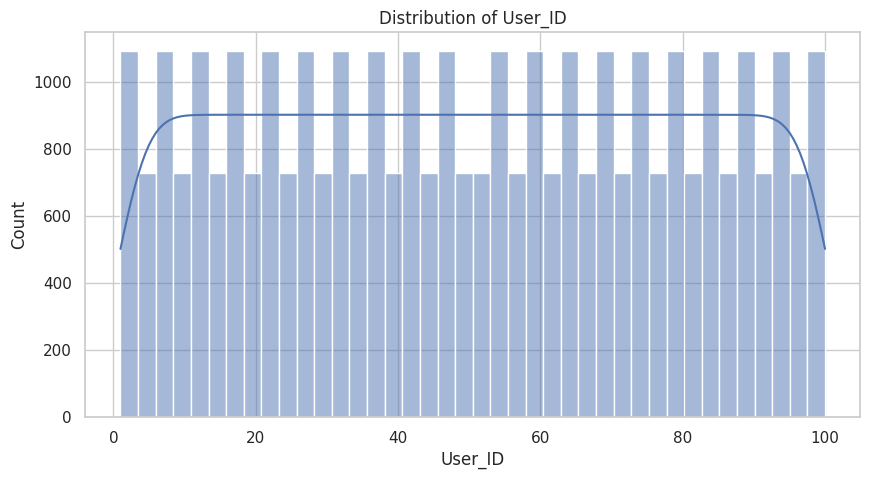

In [20]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns

if len(num_cols) > 0:
    col = num_cols[0]
    sns.histplot(df_clean[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()
else:
    print("No numeric columns found.")


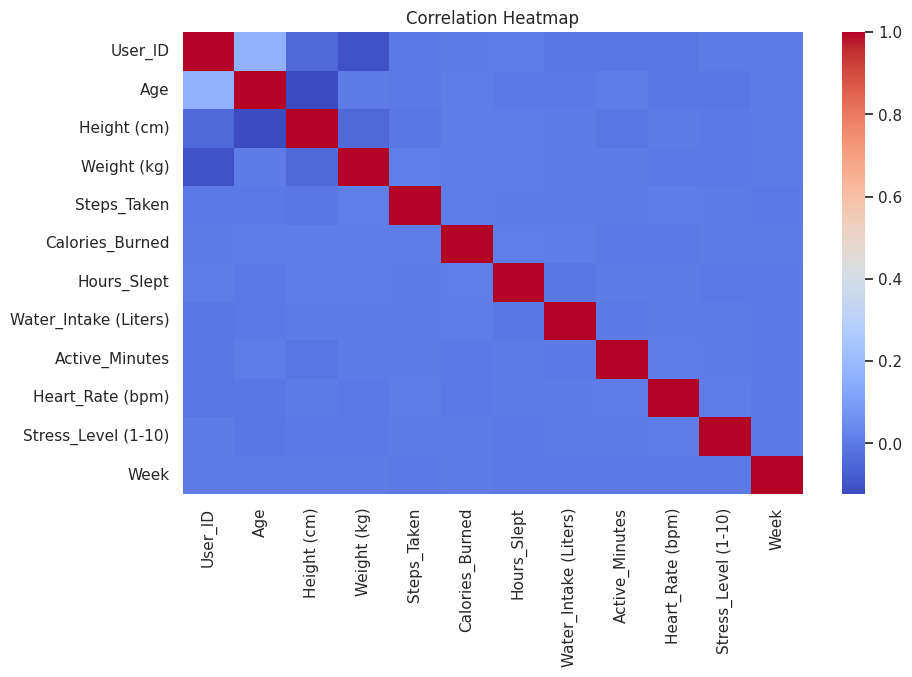

In [21]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns

if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df_clean[num_cols].corr(), cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")


In [22]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns

if len(num_cols) >= 2:
    fig = px.scatter(
        df_clean,
        x=num_cols[0],
        y=num_cols[1],
        title=f"{num_cols[0]} vs {num_cols[1]}",
        hover_data=df_clean.columns
    )
    fig.show()
else:
    print("Not enough numeric columns for scatter plot.")


In [23]:
date_cols = [c for c in df_clean.columns if "date" in c.lower()]
num_cols = df_clean.select_dtypes(include=[np.number]).columns

if len(date_cols) > 0 and len(num_cols) > 0:
    date_col = date_cols[0]
    metric = num_cols[0]

    fig = px.line(
        df_clean.sort_values(date_col),
        x=date_col,
        y=metric,
        title=f"{metric} Over Time"
    )
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
else:
    print("Need at least one date column and one numeric column.")
